In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
buildings_train_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/buildings-vs-forests/traning_set/buildings", "gray"
)

In [3]:
buildings_test_images = imp.read_images(
    "/Users/sameergururajmathad/Documents/CSC - 481/Final Project/buildings-vs-forests/test_set/buildings", "gray"
)

In [4]:
forest_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/buildings-vs-forests/traning_set/forest", format='gray')

In [5]:
forest_test_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/buildings-vs-forests/test_set/forest", format='gray')

In [6]:
train_packed = ImagePacker(data = [buildings_train_images, forest_train_images])


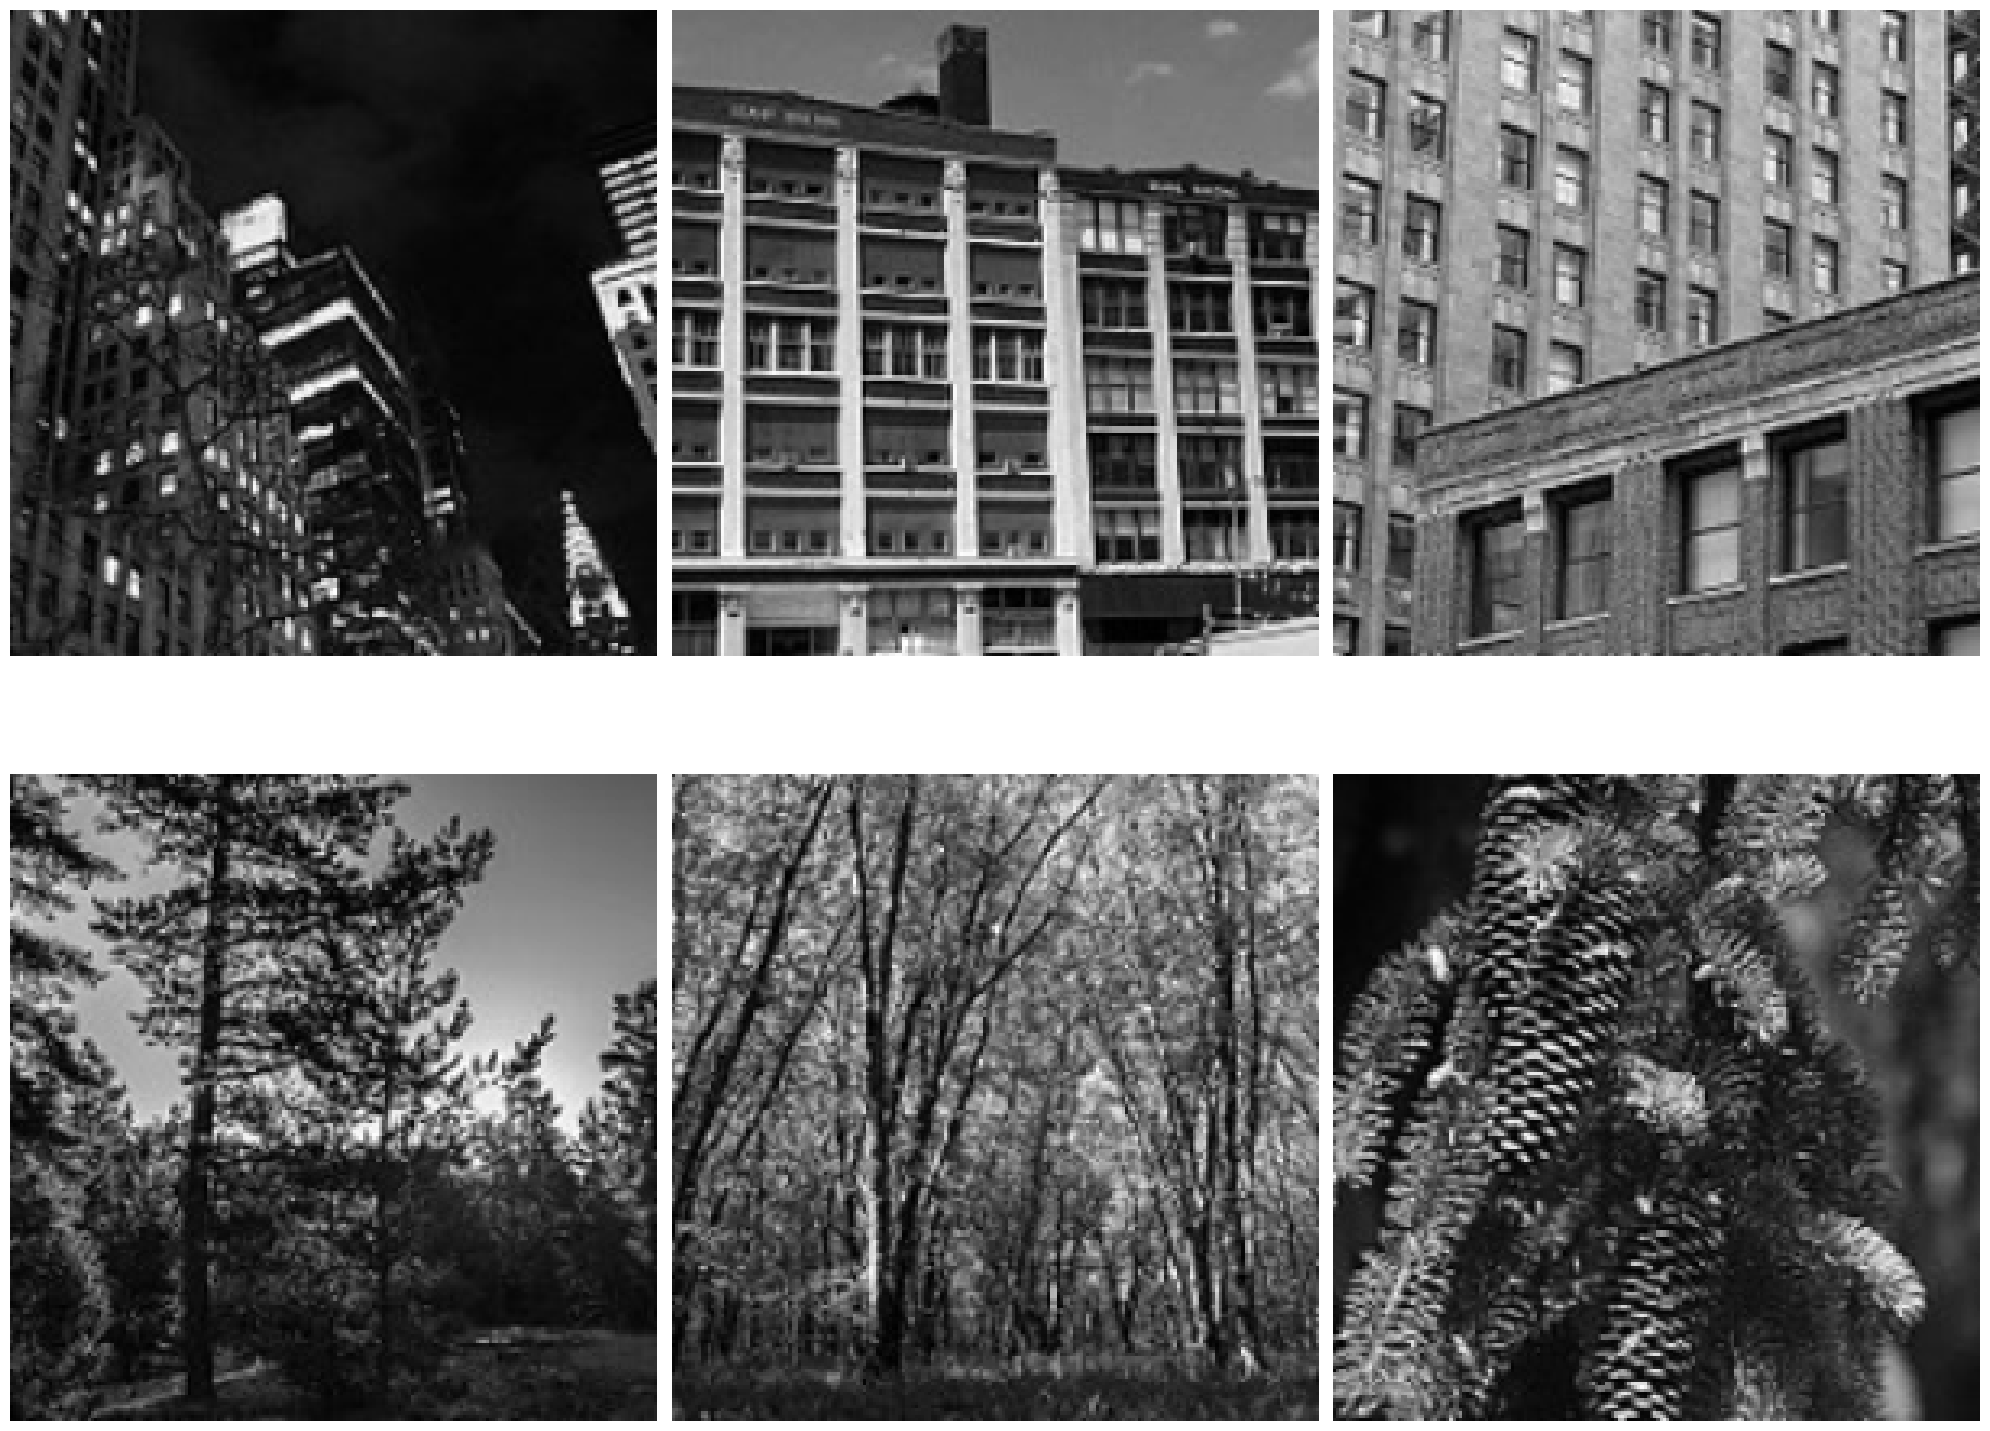

ImagePacker

In [7]:
train_packed

In [8]:
test_packed = ImagePacker(data = [buildings_test_images, forest_test_images])

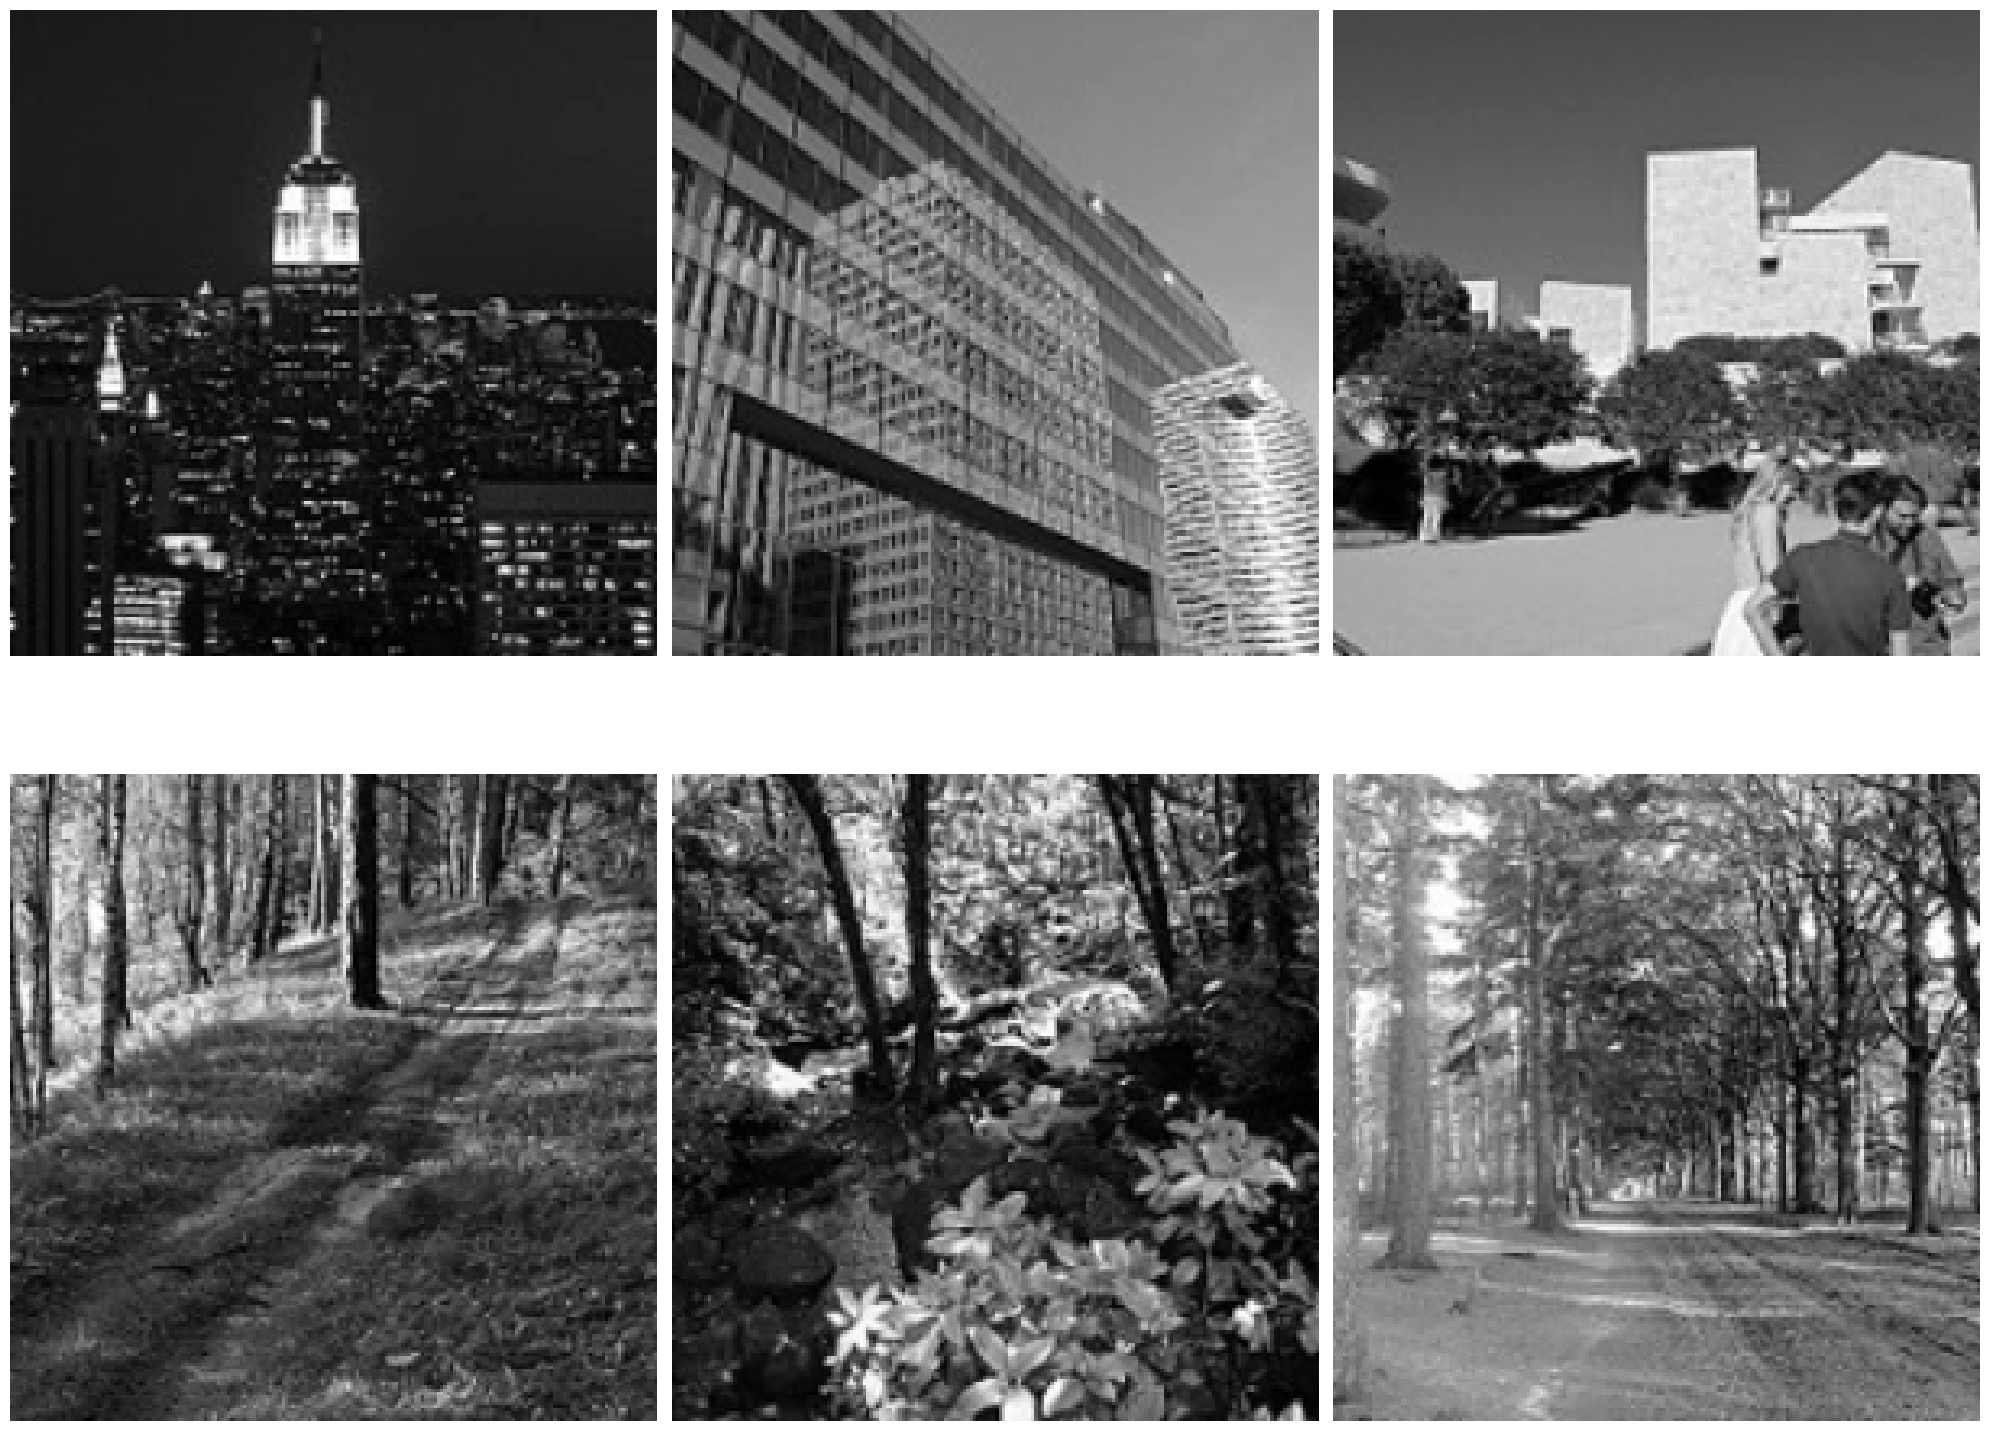

ImagePacker

In [9]:
test_packed

In [10]:
train_hog = train_packed.to_hog(append_label=[1,-1])
test_hog = test_packed.to_hog(append_label=[1,-1])

In [11]:
train_df = train_packed.descriptor_to_df(train_hog)
test_df = test_packed.descriptor_to_df(test_hog)

In [12]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,target
2945,0.536050,0.373053,0.127842,0.285670,0.269439,0.219663,0.167621,0.085200,0.565089,0.171615,...,0.314180,0.347712,0.339772,0.175752,0.409968,0.269514,0.472142,0.289019,0.294775,-1
2795,0.140467,0.056500,0.042304,0.043829,0.409249,0.635118,0.272976,0.388148,0.421107,0.315273,...,0.542978,0.164661,0.191136,0.214193,0.165413,0.599572,0.244754,0.268338,0.277295,-1
273,0.703026,0.000000,0.001631,0.000000,0.696692,0.000000,0.142732,0.000000,0.000000,0.865246,...,0.387732,0.006962,0.017022,0.000000,0.462836,0.112211,0.173665,0.012280,0.769549,1
462,0.341304,0.003565,0.006426,0.001681,0.803172,0.006927,0.172576,0.020323,0.456207,0.517273,...,0.130785,0.009050,0.171873,0.279735,0.763721,0.424509,0.223929,0.169485,0.180760,1
3138,0.100914,0.391523,0.272483,0.298979,0.362349,0.457987,0.148047,0.347815,0.434682,0.580982,...,0.331703,0.000000,0.090364,0.201966,0.743843,0.061702,0.179361,0.021815,0.501260,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0.191853,0.056886,0.172545,0.391389,0.722918,0.256908,0.334574,0.252595,0.112439,0.192635,...,0.445212,0.683938,0.397879,0.167212,0.169992,0.226543,0.199110,0.144639,0.083451,-1
1899,0.700000,0.000000,0.000000,0.000000,0.700000,0.000000,0.141421,0.000000,0.000000,1.000000,...,0.545579,0.176038,0.147936,0.505686,0.357823,0.203903,0.022936,0.198868,0.429025,1
2937,0.353675,0.014771,0.018655,0.060011,0.793314,0.017366,0.175994,0.020559,0.457931,0.526741,...,0.609875,0.303604,0.133659,0.182269,0.499069,0.269882,0.212947,0.024223,0.341981,-1
3736,0.291574,0.220653,0.146872,0.090436,0.693243,0.355230,0.239242,0.396108,0.125039,0.309171,...,0.429419,0.685853,0.304155,0.226042,0.345333,0.000000,0.181640,0.195718,0.105100,-1


In [13]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,target
14,0.560805,0.026015,0.030684,0.034928,0.775277,0.034970,0.163726,0.023072,0.230314,0.714625,...,0.641265,0.035214,0.004918,0.004425,0.714000,0.003686,0.152479,0.000000,0.233316,1
598,0.124074,0.042442,0.314970,0.430663,0.678588,0.307829,0.132012,0.312064,0.167558,0.056819,...,0.333342,0.400268,0.160892,0.476694,0.327015,0.262507,0.241780,0.438937,0.220394,-1
727,0.538286,0.035263,0.095640,0.108097,0.638490,0.096988,0.316358,0.139996,0.389122,0.619389,...,0.413526,0.430806,0.377909,0.282154,0.149899,0.182578,0.109679,0.414943,0.425400,-1
813,0.177874,0.299893,0.180133,0.203045,0.351577,0.619430,0.366390,0.296997,0.273862,0.419903,...,0.349676,0.213114,0.175151,0.221502,0.522199,0.068840,0.279202,0.025848,0.629695,-1
408,0.413370,0.015562,0.169267,0.323690,0.178938,0.219413,0.298770,0.118958,0.715459,0.843225,...,0.556392,0.011865,0.049149,0.092886,0.807166,0.016780,0.150084,0.050129,0.049057,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,0.389197,0.254964,0.146154,0.126994,0.248383,0.342608,0.264357,0.375440,0.596755,0.263463,...,0.661652,0.171374,0.060498,0.157642,0.154094,0.577350,0.279699,0.076702,0.251283,-1
394,0.171347,0.202045,0.230291,0.708761,0.361882,0.220882,0.037409,0.217081,0.382324,0.574453,...,0.430192,0.274079,0.257569,0.094404,0.280481,0.343846,0.064612,0.324208,0.598646,1
786,0.031444,0.158120,0.232660,0.240927,0.796727,0.392911,0.142372,0.163387,0.160358,0.215182,...,0.625669,0.242118,0.030340,0.382280,0.229190,0.444429,0.079471,0.251031,0.288931,-1
423,0.193901,0.087071,0.087255,0.187301,0.667153,0.043356,0.169019,0.020515,0.660428,0.598154,...,0.232405,0.129496,0.104196,0.209654,0.835065,0.179239,0.119625,0.065793,0.355399,1


In [14]:
train_X, train_y = train_df.iloc[:, :-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:, :-1], test_df.iloc[:,-1]

In [15]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [16]:
predictions = model.predict(test_X)


In [17]:
f"Accuracy: {accuracy_score(test_y, predictions)*100} %"

'Accuracy: 98.90230515916575 %'